In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
url='https://raw.githubusercontent.com/WaTheDarknest/CSI/main/Dataset/Dataset/%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%994/TX1(%E0%B8%8A%E0%B8%B1%E0%B9%89%E0%B8%994)(%E0%B8%AB%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%81%E0%B8%95%E0%B8%B4)(60Sec).csv'
dataset=pd.read_csv(url)
dataset

<ipython-input-80-4845093f692c>:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



,real_timestamp,Delta t,Zone,R1,I1,Mag1,R2,I2,Mag2,R3,...,Mag61,R62,I62,Mag62,R63,I63,Mag63,R64,I64,Mag64
0,0.595506,-,1,28,-64,69.856997,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.601973,0.006467,1,-99,-48,110.022725,9,0,9,0,...,0,0,0,0,0,0,0,0,0,0
2,0.626595,0.024622,1,-121,112,164.878743,8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,0.636548,0.009953,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
4,0.660641,0.024093,1,-122,-31,125.876924,23,0,23,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19712,59.840200,0.006,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
19713,59.845600,0.0054,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
19714,59.924800,0.0792,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
19715,59.930900,0.0061,4,84,-64,105.603030,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cols = [ 'Mag7', 'Mag8', 'Mag9', 'Mag10', 'Mag11', 'Mag12', 'Mag13', 'Mag14', 'Mag15', 'Mag16', 'Mag17', 'Mag18', 'Mag19', 'Mag20'
          , 'Mag21', 'Mag22', 'Mag23', 'Mag24', 'Mag25', 'Mag26', 'Mag27', 'Mag28', 'Mag29', 'Mag30', 'Mag31', 'Mag32', 'Mag34', 'Mag35', 'Mag36', 'Mag37'
          , 'Mag38', 'Mag39', 'Mag40', 'Mag41', 'Mag42', 'Mag43', 'Mag44', 'Mag45', 'Mag46', 'Mag47' ,'Mag48', 'Mag49', 'Mag50', 'Mag51', 'Mag52', 'Mag53'
          , 'Mag54', 'Mag55', 'Mag56', 'Mag57', 'Mag58', 'Mag59'] #52

# 'Mag1', 'Mag2'                                                                                                                 ไม่นำมาพิจารณาเพราะว่าตัวแปรดังกล่าวค่าส่วนใหญ่มีค่าที่ซ้ำกัน
# 'Mag3', 'Mag4', 'Mag5', 'Mag6', 'Mag33', 'Mag60', 'Mag61', 'Mag62', 'Mag63', 'Mag64'               ไม่นำมาพิจารณาเพราะว่าตัวแปรดังกล่าวมีค่าเป็น 0

X=dataset[cols]
scaler = StandardScaler()
X_scale=scaler.fit_transform(X)
X_scale = X_scale.round(10)
y = np.array(dataset['Zone'])

encoder = OneHotEncoder()
y_targets = encoder.fit_transform(dataset[['Zone']]).toarray()


In [82]:
from sklearn.model_selection import train_test_split
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(
    X, y_targets,
    test_size=test_size, random_state=4)

In [83]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Nh = Ns / a(Ni+No) = 19716 / 2(52+4) = 176.0357 =177

# เนื่องจากใช้ Feature 52 Feature นำมาพิจารณา จึงกำหนดให้ input_dim=52
model.add(Dense(39, input_dim=52, activation='relu'))

model.add(Dense(39, input_dim=39, activation='relu'))

model.add(Dense(39, input_dim=39, activation='relu'))

model.add(Dense(39, input_dim=39, activation='relu'))

# Class ของ Feature ในที่นี้ถูกแยกด้วย Zone มีทั้งหมด 4 Class จึงกำหนดให้ output_dim=4
model.add(Dense(4, activation='softmax'))

In [84]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
history = model.fit(X_train, y_train, epochs=1000, verbose=1)

Epoch 1/1000
555/555 [==============================] - 2s 2ms/step - loss: 0.0627 - accuracy: 0.8434
Epoch 2/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9083
Epoch 3/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9129
Epoch 4/1000
555/555 [==============================] - 2s 3ms/step - loss: 0.0302 - accuracy: 0.9250
Epoch 5/1000
555/555 [==============================] - 2s 3ms/step - loss: 0.0276 - accuracy: 0.9292
Epoch 6/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9319
Epoch 7/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.0262 - accuracy: 0.9338
Epoch 8/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9343
Epoch 9/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.0255 - accuracy: 0.9355
Epoch 10/1000
555/555 [==============================] - 1s 2ms/step - loss: 0.025

In [86]:
results = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % results[1])

62/62 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9589
Accuracy: 0.959


Plot Correlation Matrix

<ipython-input-87-7b8260d9146a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



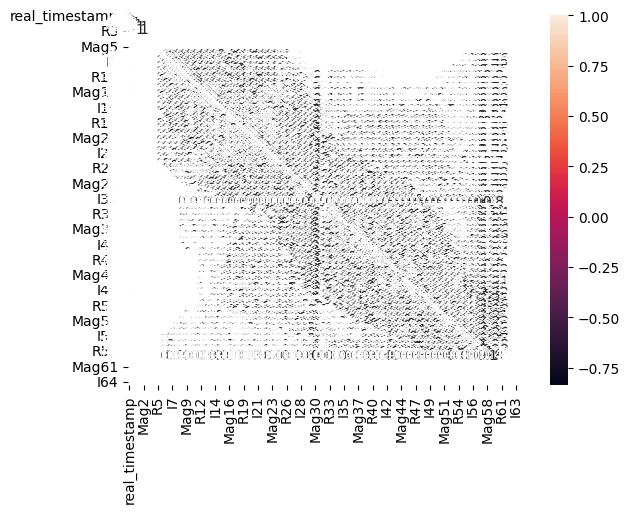

In [87]:
correlation_matrix = dataset.corr().round(10)

sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('correlation_matrix.jpeg')

Plot Loss

In [88]:
import plotly.graph_objs as go
import plotly

h1 = go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                        name="loss"
                   )
data = h1
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1)